In [1]:
from pathlib import Path
import sys

sys.path.append(str(Path('').absolute().parent))


from stable_baselines3 import DQN, A2C
from stable_baselines3.a2c import MlpPolicy
from stable_baselines3.common.env_util import make_vec_env

from gym_snake.envs.SnakeEnv import SnakeEnv

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import random
random.seed(42)

pygame 2.0.1 (SDL 2.0.14, Python 3.8.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
def plot_metrics(metrics, filepath=None):
    formatted_dict = {'episodes': [],
                      'metrics': [],
                      'results': []}

    n = len(metrics['score'])
    for i in range(n):        
        score = metrics['score'][i]
        reward = metrics['reward'][i]

        formatted_dict['episodes'].append(i)
        formatted_dict['metrics'].append('score')
        formatted_dict['results'].append(score)

        formatted_dict['episodes'].append(i)
        formatted_dict['metrics'].append('reward')
        formatted_dict['results'].append(reward)

    df_metrics = pd.DataFrame(formatted_dict)
    sns.lineplot(data=df_metrics, x='episodes', y='results', hue='metrics')
    if filepath is None:
        plt.show()
    else:
        plt.savefig(filepath)
        
def evaluate(model):
    snake_env = SnakeEnv(440, 440, enable_render=False)
    env = make_vec_env(lambda: snake_env, n_envs=1)
    obs = env.reset()

    for _ in range(10000):
        action, _states = model.predict(obs)
        obs, rewards, dones, info = env.step(action)
        env.render()

    return snake_env.record, np.mean(np.array(snake_env.results['score']))

In [3]:
results = {}
for _ in range(10):
    # enable_render=True turns on the display
    snake_env = SnakeEnv(440, 440, enable_render=False)
    env = make_vec_env(lambda: snake_env, n_envs=1)

    gamma = random.uniform(0.95, 1)
    
    model = A2C(MlpPolicy, env, verbose=1, learning_rate=1e-3, seed=42, gamma=gamma)
    model.learn(total_timesteps=20000, log_interval=1000)

    # Print rewards and scores for each episode
    max_train_score = snake_env.record
    mean_train_score = np.mean(np.array(snake_env.results['score']))
    max_test_score, mean_test_score = evaluate(model)
    
    results[gamma] = (snake_env.results, max_train_score, max_test_score, mean_train_score, mean_test_score)

Using cpu device
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 86.2     |
|    ep_rew_mean        | -35.3    |
| time/                 |          |
|    fps                | 240      |
|    iterations         | 1000     |
|    time_elapsed       | 20       |
|    total_timesteps    | 5000     |
| train/                |          |
|    entropy_loss       | -0.503   |
|    explained_variance | 0.0313   |
|    learning_rate      | 0.001    |
|    n_updates          | 999      |
|    policy_loss        | -0.247   |
|    value_loss         | 0.785    |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 78.7     |
|    ep_rew_mean        | -6.7     |
| time/                 |          |
|    fps                | 240      |
|    iterations         | 2000     |
|    time_elapsed       | 41       |
|    total_timesteps    | 10000    |
| train/             

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 74.9     |
|    ep_rew_mean        | -3.3     |
| time/                 |          |
|    fps                | 233      |
|    iterations         | 2000     |
|    time_elapsed       | 42       |
|    total_timesteps    | 10000    |
| train/                |          |
|    entropy_loss       | -0.00186 |
|    explained_variance | 0.498    |
|    learning_rate      | 0.001    |
|    n_updates          | 1999     |
|    policy_loss        | 2.98e-05 |
|    value_loss         | 0.134    |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 101      |
|    ep_rew_mean        | 24       |
| time/                 |          |
|    fps                | 236      |
|    iterations         | 3000     |
|    time_elapsed       | 63       |
|    total_timesteps    | 15000    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 79       |
|    ep_rew_mean        | -1.3     |
| time/                 |          |
|    fps                | 228      |
|    iterations         | 3000     |
|    time_elapsed       | 65       |
|    total_timesteps    | 15000    |
| train/                |          |
|    entropy_loss       | -0.0401  |
|    explained_variance | -1.35    |
|    learning_rate      | 0.001    |
|    n_updates          | 2999     |
|    policy_loss        | -0.00154 |
|    value_loss         | 0.07     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 100      |
|    ep_rew_mean        | 3.6      |
| time/                 |          |
|    fps                | 225      |
|    iterations         | 4000     |
|    time_elapsed       | 88       |
|    total_timesteps    | 20000    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 110      |
|    ep_rew_mean        | 27.9     |
| time/                 |          |
|    fps                | 246      |
|    iterations         | 4000     |
|    time_elapsed       | 81       |
|    total_timesteps    | 20000    |
| train/                |          |
|    entropy_loss       | -0.26    |
|    explained_variance | 0.569    |
|    learning_rate      | 0.001    |
|    n_updates          | 3999     |
|    policy_loss        | 0.659    |
|    value_loss         | 2.49     |
------------------------------------


Gamma 0.9819713399228942


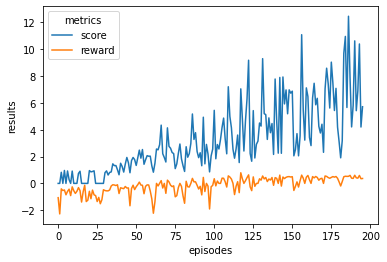

Max Train Score 24 Max Test Score 24
Mean Train Score 3.2674973017318076 Mean Test Score 6.759667856199609
----------------------------------------------------------------------------------------------------
Gamma 0.9886664476628992


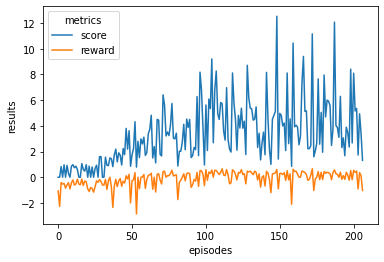

Max Train Score 24 Max Test Score 29
Mean Train Score 3.3514710021207885 Mean Test Score 5.418458671167024
----------------------------------------------------------------------------------------------------
Gamma 0.973196334529025


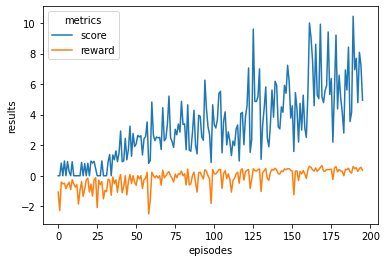

Max Train Score 20 Max Test Score 30
Mean Train Score 3.287301360015103 Mean Test Score 6.175000358985938
----------------------------------------------------------------------------------------------------
Gamma 0.9873921820490624


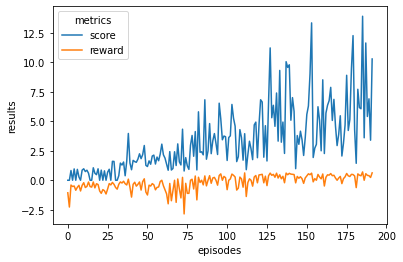

Max Train Score 28 Max Test Score 28
Mean Train Score 3.397242077681623 Mean Test Score 6.371117623777111
----------------------------------------------------------------------------------------------------
Gamma 0.9820268644156176


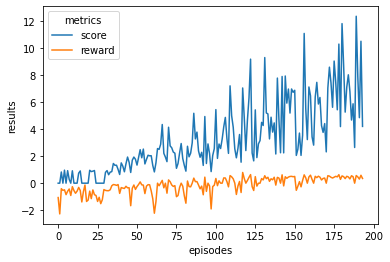

Max Train Score 25 Max Test Score 25
Mean Train Score 3.2798389805041936 Mean Test Score 6.162734823213195
----------------------------------------------------------------------------------------------------
Gamma 0.9538535015643193


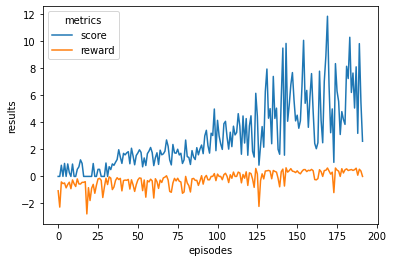

Max Train Score 22 Max Test Score 27
Mean Train Score 2.943231742868512 Mean Test Score 6.427161600198879
----------------------------------------------------------------------------------------------------
Gamma 0.957312172171248


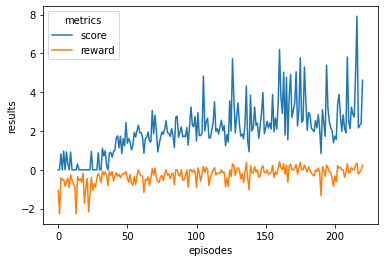

Max Train Score 15 Max Test Score 19
Mean Train Score 2.0572158940088996 Mean Test Score 3.509590580375311
----------------------------------------------------------------------------------------------------
Gamma 0.9863929070453064


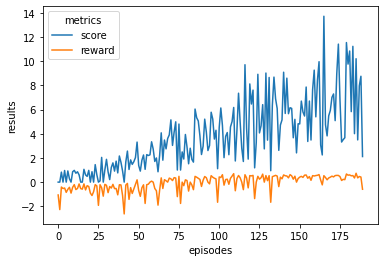

Max Train Score 25 Max Test Score 36
Mean Train Score 3.7840855141315006 Mean Test Score 7.245876732365217
----------------------------------------------------------------------------------------------------
Gamma 0.9697797781176927


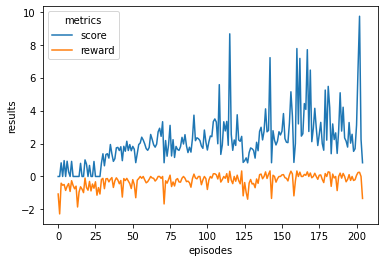

Max Train Score 18 Max Test Score 24
Mean Train Score 2.183521724339495 Mean Test Score 3.897503890328313
----------------------------------------------------------------------------------------------------
Gamma 0.9525270202313946


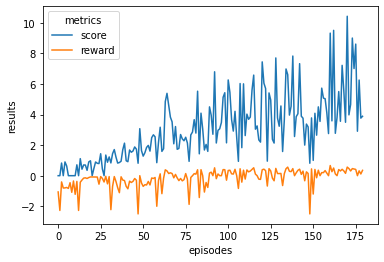

Max Train Score 19 Max Test Score 18
Mean Train Score 3.0297776720839655 Mean Test Score 3.6955285913316573
----------------------------------------------------------------------------------------------------


In [4]:
for gamma, result in results.items():
    metrics, max_train_score, max_test_score, mean_train_score, mean_test_score = result
    
    print("Gamma", gamma)
    plot_metrics(metrics)    
    print("Max Train Score", max_train_score, "Max Test Score", max_test_score)
    print("Mean Train Score", mean_train_score, "Mean Test Score", mean_test_score)
    print("-"*100)

### Testando: normalize_advantage

Using cpu device
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 119      |
|    ep_rew_mean        | -41.5    |
| time/                 |          |
|    fps                | 244      |
|    iterations         | 1000     |
|    time_elapsed       | 20       |
|    total_timesteps    | 5000     |
| train/                |          |
|    entropy_loss       | -1.02    |
|    explained_variance | -0.00354 |
|    learning_rate      | 0.001    |
|    n_updates          | 999      |
|    policy_loss        | -0.115   |
|    value_loss         | 1e-06    |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 117      |
|    ep_rew_mean        | -35.5    |
| time/                 |          |
|    fps                | 253      |
|    iterations         | 2000     |
|    time_elapsed       | 39       |
|    total_timesteps    | 10000    |
| train/             

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 154      |
|    ep_rew_mean        | -40.9    |
| time/                 |          |
|    fps                | 238      |
|    iterations         | 2000     |
|    time_elapsed       | 41       |
|    total_timesteps    | 10000    |
| train/                |          |
|    entropy_loss       | -0.535   |
|    explained_variance | 0.134    |
|    learning_rate      | 0.001    |
|    n_updates          | 1999     |
|    policy_loss        | -0.134   |
|    value_loss         | 0.0481   |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 171      |
|    ep_rew_mean        | -38.5    |
| time/                 |          |
|    fps                | 235      |
|    iterations         | 3000     |
|    time_elapsed       | 63       |
|    total_timesteps    | 15000    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 85.2     |
|    ep_rew_mean        | -47.3    |
| time/                 |          |
|    fps                | 226      |
|    iterations         | 3000     |
|    time_elapsed       | 66       |
|    total_timesteps    | 15000    |
| train/                |          |
|    entropy_loss       | -0.652   |
|    explained_variance | -0.329   |
|    learning_rate      | 0.001    |
|    n_updates          | 2999     |
|    policy_loss        | -0.297   |
|    value_loss         | 0.00135  |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 86.3     |
|    ep_rew_mean        | -48.9    |
| time/                 |          |
|    fps                | 229      |
|    iterations         | 4000     |
|    time_elapsed       | 87       |
|    total_timesteps    | 20000    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 106      |
|    ep_rew_mean        | -1       |
| time/                 |          |
|    fps                | 237      |
|    iterations         | 4000     |
|    time_elapsed       | 84       |
|    total_timesteps    | 20000    |
| train/                |          |
|    entropy_loss       | -0.0162  |
|    explained_variance | -97.1    |
|    learning_rate      | 0.001    |
|    n_updates          | 3999     |
|    policy_loss        | -0.00142 |
|    value_loss         | 61.2     |
------------------------------------
Gamma 0.9558658099721666


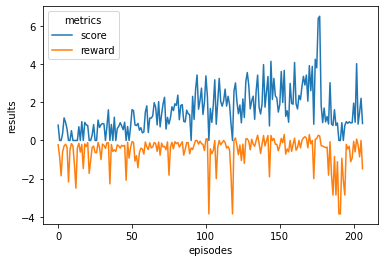

Max Train Score 10 Max Test Score 11
Mean Train Score 1.5313159062381123 Mean Test Score 2.4016239550087564
----------------------------------------------------------------------------------------------------
Gamma 0.9787879580368415


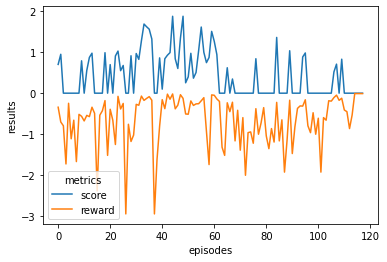

Max Train Score 3 Max Test Score 0
Mean Train Score 0.4207030777645884 Mean Test Score 0.0
----------------------------------------------------------------------------------------------------
Gamma 0.9799472292230115


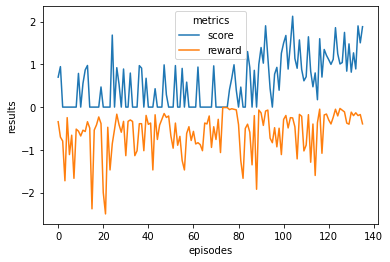

Max Train Score 4 Max Test Score 5
Mean Train Score 0.5743579519801391 Mean Test Score 1.5437310619002158
----------------------------------------------------------------------------------------------------
Gamma 0.9854392641917085


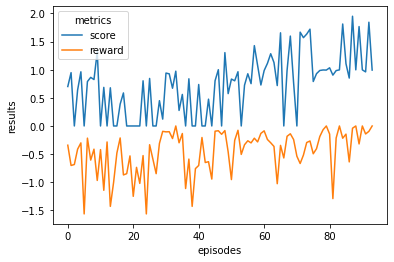

Max Train Score 3 Max Test Score 2
Mean Train Score 0.7300714261274825 Mean Test Score 0.8559496712900571
----------------------------------------------------------------------------------------------------
Gamma 0.9856474486409561


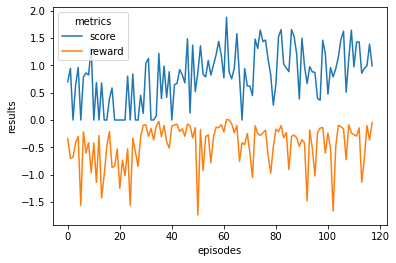

Max Train Score 3 Max Test Score 4
Mean Train Score 0.8129076985798346 Mean Test Score 1.438064314791575
----------------------------------------------------------------------------------------------------
Gamma 0.9667923768310657


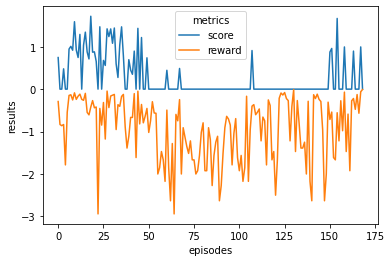

Max Train Score 3 Max Test Score 2
Mean Train Score 0.26159707373697694 Mean Test Score 0.47426771442392535
----------------------------------------------------------------------------------------------------
Gamma 0.9860360909680097


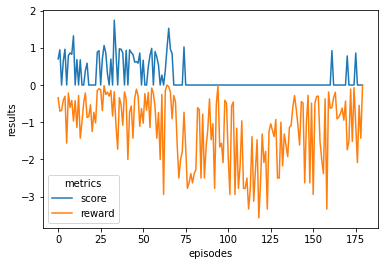

Max Train Score 3 Max Test Score 0
Mean Train Score 0.22331498570850422 Mean Test Score 0.0
----------------------------------------------------------------------------------------------------
Gamma 0.9697815950530332


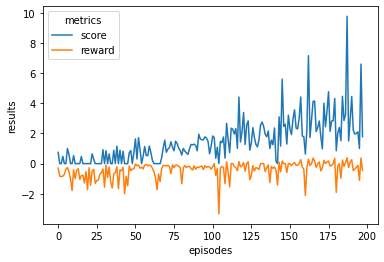

Max Train Score 17 Max Test Score 14
Mean Train Score 1.4815552229272635 Mean Test Score 2.3807075747839375
----------------------------------------------------------------------------------------------------
Gamma 0.9945665841176945


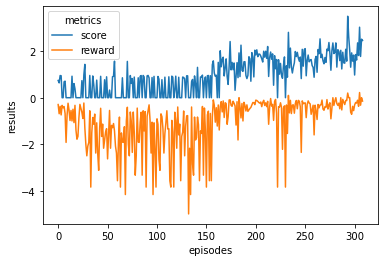

Max Train Score 9 Max Test Score 11
Mean Train Score 0.9708306040428534 Mean Test Score 2.350621533114969
----------------------------------------------------------------------------------------------------
Gamma 0.9982205014326955


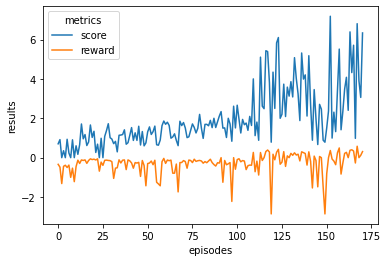

Max Train Score 13 Max Test Score 18
Mean Train Score 1.9621458424284015 Mean Test Score 3.745517725786342
----------------------------------------------------------------------------------------------------


In [5]:
results = {}
for _ in range(10):
    # enable_render=True turns on the display
    snake_env = SnakeEnv(440, 440, enable_render=False)
    env = make_vec_env(lambda: snake_env, n_envs=1)

    gamma = random.uniform(0.95, 1)
    
    model = A2C(MlpPolicy, env, verbose=1, learning_rate=1e-3, seed=42, gamma=gamma, normalize_advantage=True)
    model.learn(total_timesteps=20000, log_interval=1000)

    # Print rewards and scores for each episode
    max_train_score = snake_env.record
    mean_train_score = np.mean(np.array(snake_env.results['score']))
    max_test_score, mean_test_score = evaluate(model)
    
    results[gamma] = (snake_env.results, max_train_score, max_test_score, mean_train_score, mean_test_score)
    
for gamma, result in results.items():
    metrics, max_train_score, max_test_score, mean_train_score, mean_test_score = result
    
    print("Gamma", gamma)
    plot_metrics(metrics)    
    print("Max Train Score", max_train_score, "Max Test Score", max_test_score)
    print("Mean Train Score", mean_train_score, "Mean Test Score", mean_test_score)
    print("-"*100)

### Testando: ent_coef

Using cpu device
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 91.8     |
|    ep_rew_mean        | -43.5    |
| time/                 |          |
|    fps                | 208      |
|    iterations         | 1000     |
|    time_elapsed       | 23       |
|    total_timesteps    | 5000     |
| train/                |          |
|    entropy_loss       | -0.982   |
|    explained_variance | 0.268    |
|    learning_rate      | 0.001    |
|    n_updates          | 999      |
|    policy_loss        | 0.0409   |
|    value_loss         | 0.00126  |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 87.9      |
|    ep_rew_mean        | -13.6     |
| time/                 |           |
|    fps                | 219       |
|    iterations         | 2000      |
|    time_elapsed       | 45        |
|    total_timesteps    | 10000     |
| train/    

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 88.6     |
|    ep_rew_mean        | -26.8    |
| time/                 |          |
|    fps                | 263      |
|    iterations         | 2000     |
|    time_elapsed       | 37       |
|    total_timesteps    | 10000    |
| train/                |          |
|    entropy_loss       | -0.0251  |
|    explained_variance | nan      |
|    learning_rate      | 0.001    |
|    n_updates          | 1999     |
|    policy_loss        | -0.00196 |
|    value_loss         | 0.36     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 81.3     |
|    ep_rew_mean        | 4.1      |
| time/                 |          |
|    fps                | 237      |
|    iterations         | 3000     |
|    time_elapsed       | 63       |
|    total_timesteps    | 15000    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 95.9     |
|    ep_rew_mean        | 20.8     |
| time/                 |          |
|    fps                | 248      |
|    iterations         | 3000     |
|    time_elapsed       | 60       |
|    total_timesteps    | 15000    |
| train/                |          |
|    entropy_loss       | -0.0943  |
|    explained_variance | 0.317    |
|    learning_rate      | 0.001    |
|    n_updates          | 2999     |
|    policy_loss        | 0.0253   |
|    value_loss         | 13.3     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 106      |
|    ep_rew_mean        | 26.4     |
| time/                 |          |
|    fps                | 248      |
|    iterations         | 4000     |
|    time_elapsed       | 80       |
|    total_timesteps    | 20000    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 106      |
|    ep_rew_mean        | 26.4     |
| time/                 |          |
|    fps                | 257      |
|    iterations         | 4000     |
|    time_elapsed       | 77       |
|    total_timesteps    | 20000    |
| train/                |          |
|    entropy_loss       | -0.0968  |
|    explained_variance | 0.989    |
|    learning_rate      | 0.001    |
|    n_updates          | 3999     |
|    policy_loss        | 0.103    |
|    value_loss         | 0.192    |
------------------------------------
entropy 0.017409100974870008


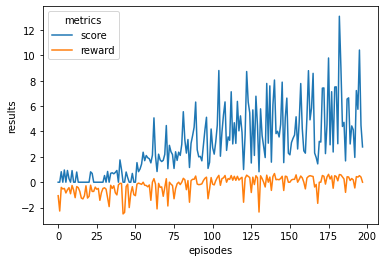

Max Train Score 24 Max Test Score 30
Mean Train Score 3.0192363943405867 Mean Test Score 5.461390533238072
----------------------------------------------------------------------------------------------------
entropy 0.008359707377781633


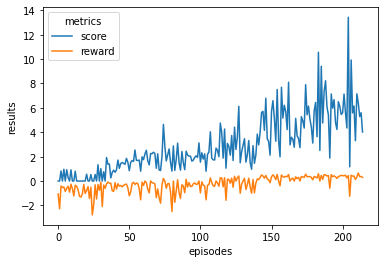

Max Train Score 25 Max Test Score 30
Mean Train Score 2.89886086677891 Mean Test Score 7.131032686361102
----------------------------------------------------------------------------------------------------
entropy 0.0402850773301821


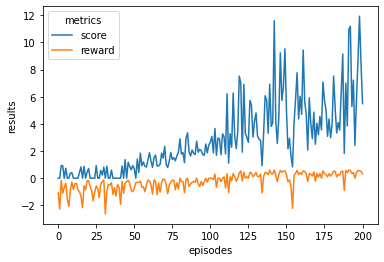

Max Train Score 23 Max Test Score 31
Mean Train Score 2.835303307190924 Mean Test Score 6.407545348787234
----------------------------------------------------------------------------------------------------
entropy 0.03977158681886638


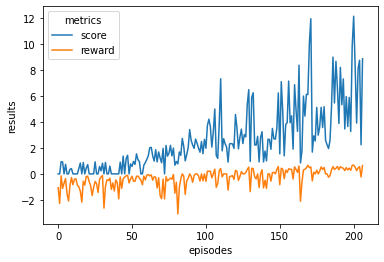

Max Train Score 23 Max Test Score 31
Mean Train Score 2.5979289747169805 Mean Test Score 6.097508975742374
----------------------------------------------------------------------------------------------------
entropy 0.01142066513589688


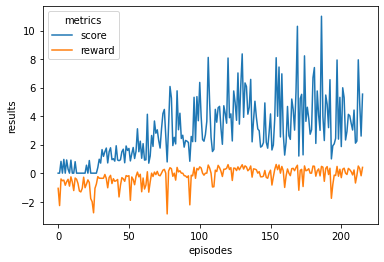

Max Train Score 22 Max Test Score 26
Mean Train Score 2.9724339132991875 Mean Test Score 4.751743223589518
----------------------------------------------------------------------------------------------------


In [6]:
results = {}
for _ in range(10):
    # enable_render=True turns on the display
    snake_env = SnakeEnv(440, 440, enable_render=False)
    env = make_vec_env(lambda: snake_env, n_envs=1)

    entropy = random.uniform(0, 0.1)
    
    model = A2C(MlpPolicy, env, verbose=1, learning_rate=1e-3, seed=42, gamma=0.97, ent_coef=entropy)
    model.learn(total_timesteps=20000, log_interval=1000)

    # Print rewards and scores for each episode
    max_train_score = snake_env.record
    mean_train_score = np.mean(np.array(snake_env.results['score']))
    max_test_score, mean_test_score = evaluate(model)
    
    results[entropy] = (snake_env.results, max_train_score, max_test_score, mean_train_score, mean_test_score)
    
for entropy, result in results.items():
    metrics, max_train_score, max_test_score, mean_train_score, mean_test_score = result
    
    print("entropy", entropy)
    plot_metrics(metrics)    
    print("Max Train Score", max_train_score, "Max Test Score", max_test_score)
    print("Mean Train Score", mean_train_score, "Mean Test Score", mean_test_score)
    print("-"*100)